# DATA SCIENCE / SECTION 2 / Project / 이원빈

### 타이타닉 선정 이유

가장 유명한 데이터셋이고 데이터 중 보통은 중요하지 않은 이름을 잘 사용하면 가장 중요한 특성으로 사용 할 수 있는 점이 좋았습니다.

결측치를 처리하는 방법도 고민해볼만 했습니다.

타이타닉호 탑승객의 생존 여부를 분류하는 모델을 만들었습니다.

### 베이스라인

분류 문제에서 베이스라인은 가장 빈번하게 일어나는 클래스를 기준으로 만들기 때문에 타겟(생존자 수)는 모든 승객이 생존하지 못할 것이라고 예측하는 모델을 베이스라인으로 정했습니다.(정확도: 0.6175)

### 목적

생존 확률에 어떤 변수가 가장 영향을 많이 주었는지 알아보기

# 1. 데이터 불러오기

In [1]:
# 코랩 API 설치
!pip install kaggle --upgrade

In [2]:
import os

os.environ['KAGGLE_USERNAME'] = 'skaldy'
os.environ['KAGGLE_KEY'] = 'cdf050bad6790c59c55a477fd4f3b444'

In [3]:
!kaggle -h

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions        Commands related to Kaggle competitions
    datasets            Commands related to Kaggle datasets
    kernels             Commands related to Kaggle kernels
    config              Configuration settings


In [4]:
!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!ls

gender_submission.csv  sample_data  test.csv  train.csv


In [6]:
# Titanic - Machine Learning from Disaster
# Start here! Predict survival on the Titanic and get familiar with ML basics
# https://www.kaggle.com/c/titanic/

# Files
# gender_submission.csv
# test.csv
# train.csv

import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2. EDA, 전처리

## 2-1. 특성 통계치

In [7]:
# id 삭제
train = train.drop(train.columns[0], 1)
test = test.drop(test.columns[0], 1)

In [8]:
# 성별을 숫자로 변환
train = train.replace(['male', 'female'], [0, 1])
test = test.replace(['male', 'female'], [0, 1])

In [9]:
# 1912년 4월 15일, 타이타닉호의 첫 항해 도중, 빙산과 충돌하여 승객과 승무원 2224명 중 1502명이 사망했다. 생존율은 32%다.
# train 샘플은 타이타닉호에 탑승한 실제 승객 수(2,224)의 40%에 해당하는 891개다.
# 구명보트가 부족해서 큰 인명피해가 발생했다.
# 여성, 어린이, 상류층 등 일부 집단은 다른 집단보다 생존 가능성이 더 높았다.

# Categorical: Survived, Sex, Embarked.
# Ordinal: Pclass.
# Continous: Age, Fare.
# Discrete: SibSp, Parch.

In [10]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


## 2-2. EDA

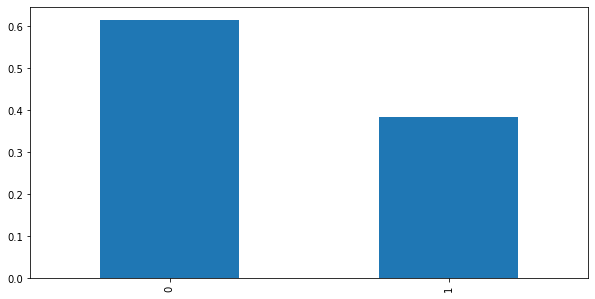

In [11]:
train['Survived'].value_counts(normalize=True).plot(kind='bar',stacked=True, figsize=(10,5))
# 데이터의 생존률은 38%다. 실제 사고의 2224명 생존률은 32%다.

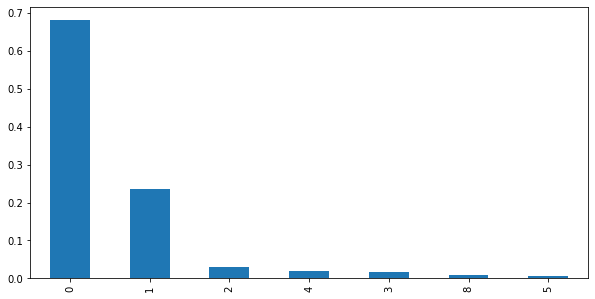

In [12]:
train['SibSp'].value_counts(normalize=True).plot(kind='bar',stacked=True, figsize=(10,5))
# 68%의 승객들이 형제자매나 배우자와 함께 탔지 않았다.

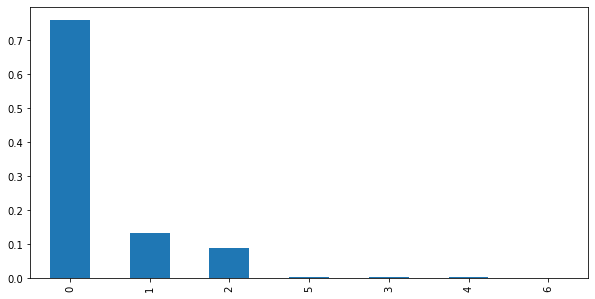

In [13]:
train['Parch'].value_counts(normalize=True).plot(kind='bar',stacked=True, figsize=(10,5))
# 76%의 승객들은 부모나 자녀와 함께 여행하지 않았다.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


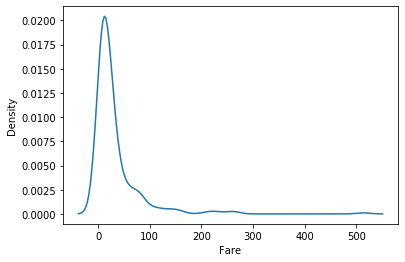

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(x=train['Fare'])
# 승객 마다 낸 요금이 크게 차이난다.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


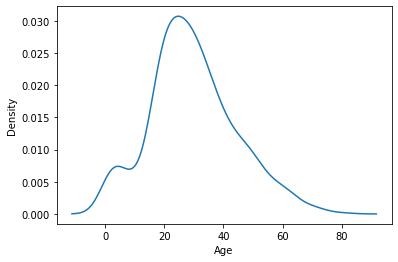

In [15]:
sns.kdeplot(x=train['Age'])
# 65~80세의 노인 승객은 1% 미만이다.

## 2-3. 피처 엔지니어링

In [16]:
from IPython.display import Image

Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")
# 4.1 how titanic sank?
# sank from the bow of the ship where third class rooms located
# conclusion, Pclass is key feature for classifier

### 2-3-1. 호칭 특성 생성

In [17]:
# 이름에서 호칭만 빼서 새로운 특성 생성
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [18]:
# Train 데이터 Title의 성별 분포
pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [19]:
# Test 데이터 Title의 성별 분포
pd.crosstab(test['Title'], test['Sex'])

Sex,0,1
Title,,
Col,2,0
Dona,0,1
Dr,1,0
Master,21,0
Miss,0,78
Mr,240,0
Mrs,0,72
Ms,0,1
Rev,2,0


In [20]:
# train[train['Title']=='Rev']

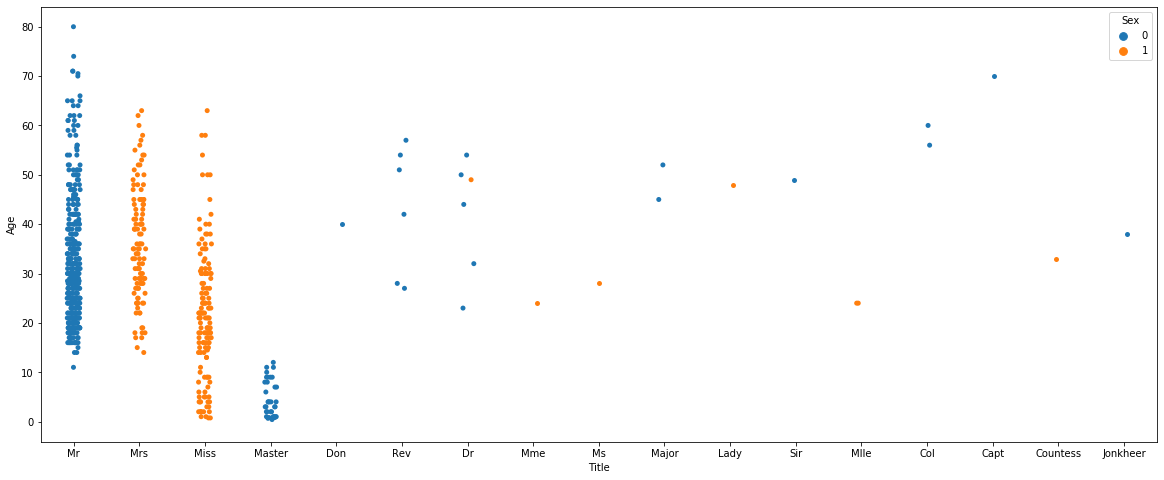

In [21]:
# 호칭 별 나이와 성별 그래프Survived
plt.figure(figsize = (20,8))
sns.stripplot(data= train, y= 'Age', x= 'Title', hue= 'Sex')
# Master는 1~12세 남성
# 대부분의 남성은 Mr
# 여성은 거의 Miss, Mrs 반반

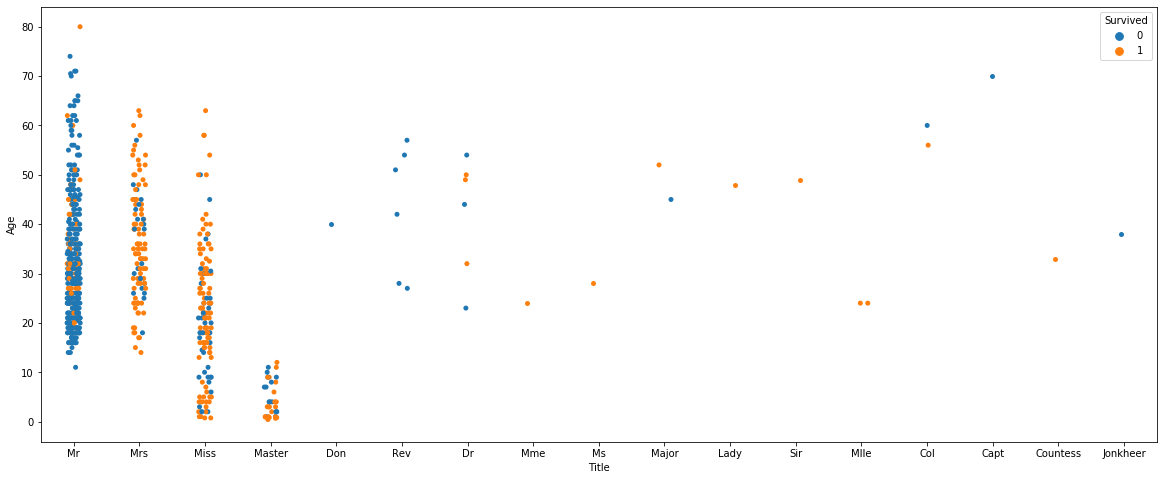

In [22]:
plt.figure(figsize = (20,8))
sns.stripplot(data= train, y= 'Age', x= 'Title', hue= 'Survived')
# 호칭 18종류

# 0(남성)
# Mr - 남성
# Don - 남부유럽 남성 존칭

# 1(기타)
# Sir - 선생 또는 장교
# Col - 대령 또는 미국 남부에서 신사를 일컫는 경칭
# Major - 소령
# Capt - 대장, 대위, 대령 등 지휘관
# Jonkheer 귀족
# Dr - 의사 또는 박사
# Rev - 목사, 전원 사망
# Countess - 백작부인

# 2(어린 남성)
# Master - 12세 이하 남성

# 3(미혼 여성)
# Miss - 미혼 여성
# Mlle - 미혼 여성, 프랑스어, 마드무아젤
# Ms - 여성

# 4(기혼 여성)
# Mrs - 기혼 여성
# Lady - 여성
# Dona - 여성 존칭
# Mme - 마담

In [23]:
# train
# 호칭 그룹 정리
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Countess', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Others')
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace('Don', 'Mr')
train['Title'] = train['Title'].replace(['Mme', 'Lady', 'Dona'], 'Mrs')
 
# 호칭 별 생존율
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.795276
1,Miss,0.702703
0,Master,0.575000
4,Others,0.333333
2,Mr,0.156371


In [24]:
# test
# 호칭 그룹 정리
test['Title'] = test['Title'].replace(['Capt', 'Col', 'Countess', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Others')
test['Title'] = test['Title'].replace(['Mlle', 'Ms'], 'Miss')
test['Title'] = test['Title'].replace('Don', 'Mr')
test['Title'] = test['Title'].replace(['Mme', 'Lady', 'Dona'], 'Mrs')

In [25]:
# 이름 특성 삭제
train.drop('Name', inplace=True, axis=1)
test.drop('Name', inplace=True, axis=1)

In [26]:
# 호칭 숫자로 변경
Title_mapping = {'Mr':0, 'Others':1, 'Master':2, 'Miss':3, 'Mrs':4}
 
train['Title'] = train['Title'].map(Title_mapping).astype(int)
test['Title'] = test['Title'].map(Title_mapping).astype(int)

### 2-3-2. 나이 결측치 처리와 비닝

In [27]:
# train 호칭 별 평균 나이 확인
train.groupby('Title')['Age'].mean()

Title
0    32.387218
1    45.700000
2     4.574167
3    21.845638
4    35.900000
Name: Age, dtype: float64

In [28]:
# 나이 결측치에 평균 나이 적용
train.loc[(train.Age.isnull())&(train.Title==0),'Age'] = 32
train.loc[(train.Age.isnull())&(train.Title==1),'Age'] = 46
train.loc[(train.Age.isnull())&(train.Title==2),'Age'] = 5
train.loc[(train.Age.isnull())&(train.Title==3),'Age'] = 22
train.loc[(train.Age.isnull())&(train.Title==4),'Age'] = 36

In [29]:
# test 호칭 별 평균 나이 확인
test.groupby('Title')['Age'].mean()

Title
0    32.000000
1    44.800000
2     7.406471
3    21.774844
4    38.904762
Name: Age, dtype: float64

In [30]:
# 나이 결측치에 평균 나이 적용
test.loc[(test.Age.isnull())&(test.Title==0),'Age'] = 32
test.loc[(test.Age.isnull())&(test.Title==1),'Age'] = 45
test.loc[(test.Age.isnull())&(test.Title==2),'Age'] = 7
test.loc[(test.Age.isnull())&(test.Title==3),'Age'] = 22
test.loc[(test.Age.isnull())&(test.Title==4),'Age'] = 39

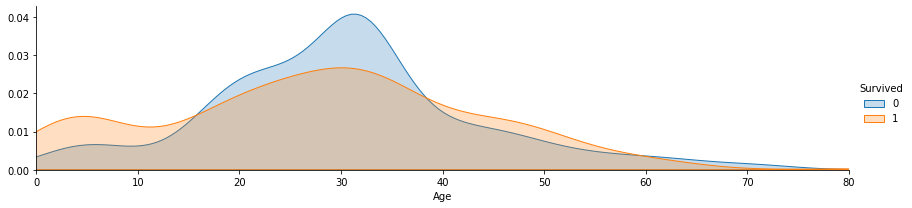

In [31]:
# 나이 별 생존 그래프
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

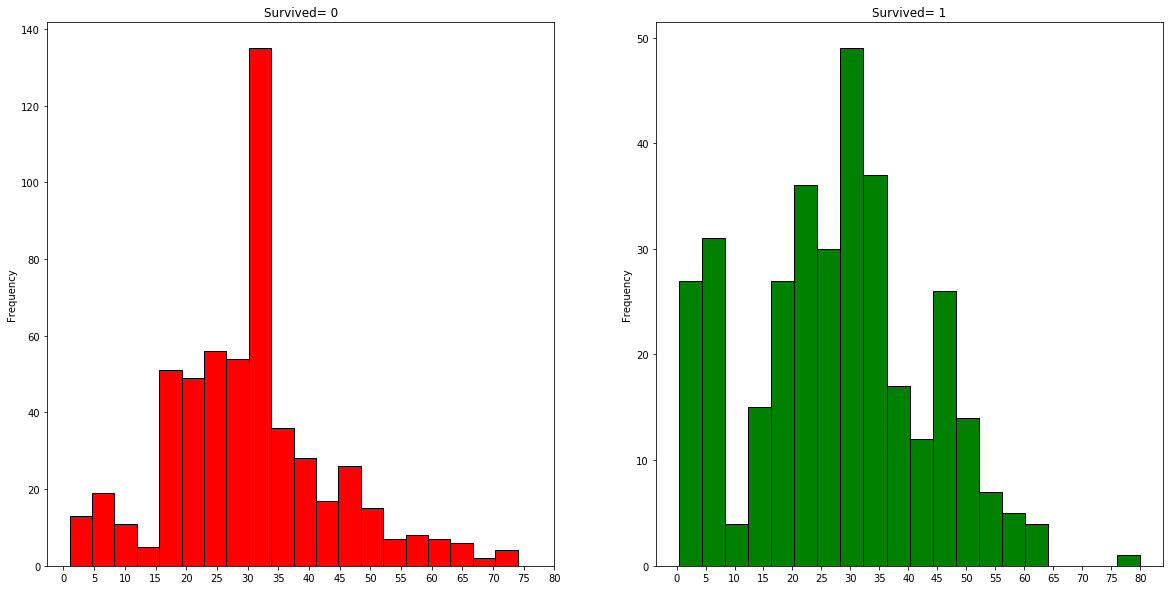

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [33]:
# plt.figure(figsize = (10,30))
# sns.countplot(y='Age', data=train, hue='Survived', dodge=False, orient='h')

In [34]:
# 5살 이하의 생존 확률
train[train['Age'] < 5]['Survived'].value_counts(normalize=True)
# 생존 확률 70%
# 자력 생존이 어렵기 때문에 주위 사람들의 도움을 많이 받았을 듯

1    0.675
0    0.325
Name: Survived, dtype: float64

In [35]:
# 6살 이상, 13살 이하의 생존 확률
train[(train['Age'] <= 12) & (train['Age'] >= 5)]['Survived'].value_counts(normalize=True)
# 생존 확률 44%
# 초등학생 정도의 나이로 최소한의 대처는 가능하기 때문에 주위의 도움이 조금 부족했을지도

1    0.538462
0    0.461538
Name: Survived, dtype: float64

In [36]:
train.loc[ train['Age'] < 5, 'Age'] = 0 # 유치원생 이하
train.loc[(train['Age'] >= 5) & (train['Age'] <= 14), 'Age'] = 1 # 초등학생
train.loc[(train['Age'] > 14) & (train['Age'] <= 30), 'Age'] = 2 # 신체 능력 높음
train.loc[(train['Age'] > 30) & (train['Age'] <= 45), 'Age'] = 3
train.loc[(train['Age'] > 45) & (train['Age'] <= 63), 'Age'] = 4
train.loc[ train['Age'] > 63, 'Age'] = 5 # 고령, 대부분 남성
# int 로 변경
train['Age'] = train['Age'].astype(int)

In [37]:
# 남성 나이 그룹 별 생존 확률
train[train['Sex']==0][['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)
# 13살을 경계로 생존 확률 차이가 큼

,Age,Survived
0,0,0.652174
1,1,0.375000
2,2,0.145540
3,3,0.178571
4,4,0.183333
5,5,0.076923


In [38]:
# 여성 나이 그룹 별 생존 확률
train[train['Sex']==1][['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)
# 생존 확률이 고르다.

,Age,Survived
0,0,0.705882
1,1,0.596491
2,2,0.750000
3,3,0.780822
4,4,0.851064


### 2-3-3. 탑승 위치 결측치 처리

In [39]:
# 영국의 사우샘프턴으로부터 프랑스의 셸부르와 아일랜드의 퀸즈타운에 기항한 뒤 미국의 뉴욕 항구로 향했다.
# Embarked는 해당 승객이 어느 항구에서 탑승했는지 정보를 나타낸다. 

In [40]:
# 탑승 위치 최빈값 확인
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
# 탑승 위치 결측치 최빈값으로 채움
train.loc[train.Embarked.isnull(),'Embarked'] = 'S'

In [42]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}

train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

### 2-3-4. 동승자 특성 통합

In [43]:
# SibSp + Parch + 1 로 Familysize 생성
train['Familysize'] = train['SibSp'] + train['Parch'] + 1
# SibSp, Parch 삭제
train.drop(['SibSp', 'Parch'], inplace=True, axis=1)

In [44]:
# SibSp + Parch + 1 로 Familysize 생성
test['Familysize'] = test['SibSp'] + test['Parch'] + 1
# SibSp, Parch 삭제
test.drop(['SibSp', 'Parch'], inplace=True, axis=1)

### 2-3-5. 요금 결측치 처리와 비닝

In [45]:
# 좌석 등급 평균 가격으로 요금 결측치 채움
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('mean'), inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('mean'), inplace=True)

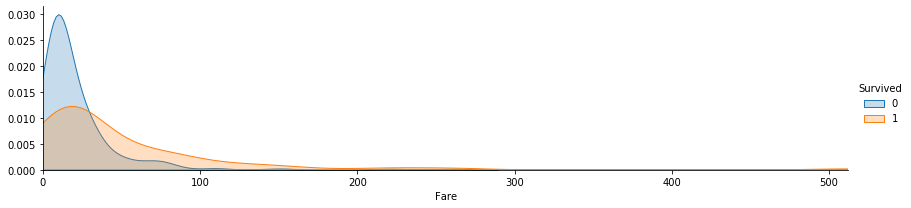

In [46]:
# 요금 별 생존 그래프
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

(0, 17)

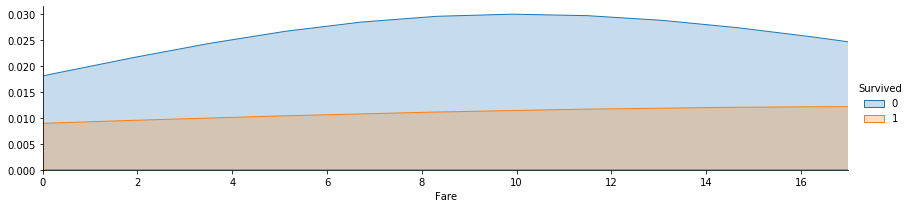

In [47]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 17)
# 사망이 많은 구간

(17, 30)

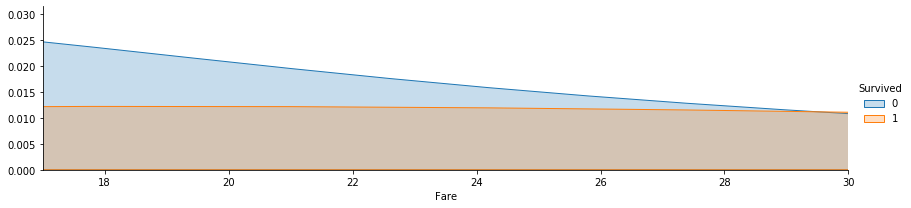

In [48]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(17, 30)
# 사망이 감소하는 구간

(30, 100)

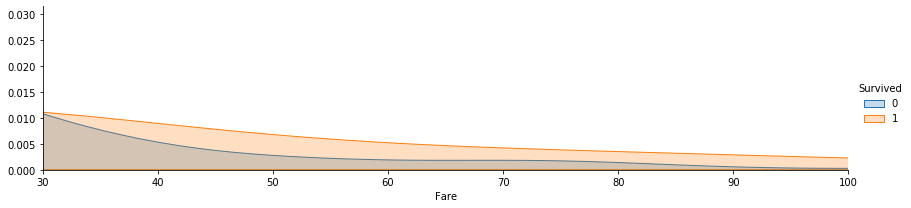

In [49]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(30, 100)
# 사망이 크게 감소하는 구간

In [50]:
train.loc[ train['Fare'] <= 17, 'Fare'] = 0 # 사망이 많은 구간
train.loc[(train['Fare'] > 17) & (train['Fare'] <= 30), 'Fare'] = 1 # 사망이 감소하는 구간
train.loc[(train['Fare'] > 30) & (train['Fare'] <= 100), 'Fare'] = 2 # 사망이 크게 감소하는 구간
train.loc[ train['Fare'] > 100, 'Fare'] = 3

In [51]:
test.loc[ test['Fare'] <= 17, 'Fare'] = 0 # 사망이 많은 구간
test.loc[(test['Fare'] > 17) & (test['Fare'] <= 30), 'Fare'] = 1 # 사망이 감소하는 구간
test.loc[(test['Fare'] > 30) & (test['Fare'] <= 100), 'Fare'] = 2 # 사망이 크게 감소하는 구간
test.loc[ test['Fare'] > 100, 'Fare'] = 3

### 2-3-6. 객실

In [52]:
# 캐비넷 결측치 Unknown 입력
train['Cabin'] = train['Cabin'].fillna('U')
test['Cabin'] = test['Cabin'].fillna('U')

In [53]:
# 캐비넷 앞문자만 남김
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

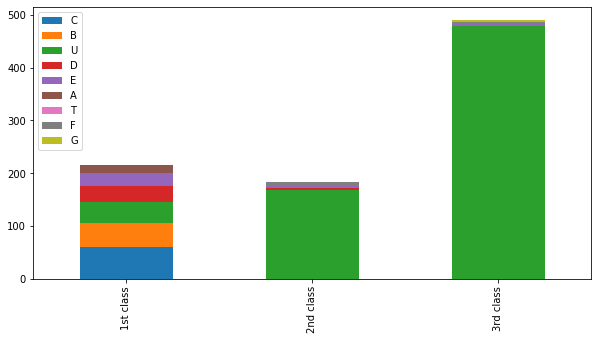

In [54]:
# 좌석 등급 별 캐비넷 그래프
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))
# 대부분 1등급 좌석에 대한 캐비넷 정보만 있다.

In [55]:
cabin_mapping = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "T": 7, "U": 10}

train['Cabin'] = train['Cabin'].map(cabin_mapping)
test['Cabin'] = test['Cabin'].map(cabin_mapping)

### 2-3-7. 티켓 특성 삭제

In [56]:
# 티켓 특성은 데이터를 정리하더라도 카디널리티가 높아서 사용하기 어렵다.
# 좌석 등급이나 요금과도 관련성이 높을 수 있어서 삭제한다.
train = train.drop('Ticket', 1)
test = test.drop('Ticket', 1)

In [57]:
train

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,0,3,0,2,0.0,10,0,0,2
1,1,1,1,3,2.0,2,1,4,2
2,1,3,1,2,0.0,10,0,3,1
3,1,1,1,3,2.0,2,0,4,2
4,0,3,0,3,0.0,10,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,2,0.0,10,0,1,1
887,1,1,1,2,1.0,1,0,3,1
888,0,3,1,1,1.0,10,0,3,4
889,1,1,0,2,1.0,2,1,0,1


In [58]:
test

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,3,0,34.5,0.0,10,2,0,1
1,3,1,47.0,0.0,10,0,4,2
2,2,0,62.0,0.0,10,2,0,1
3,3,0,27.0,0.0,10,0,0,1
4,3,1,22.0,0.0,10,0,4,3
...,...,...,...,...,...,...,...,...
413,3,0,32.0,0.0,10,0,0,1
414,1,1,39.0,3.0,2,1,4,1
415,3,0,38.5,0.0,10,0,0,1
416,3,0,32.0,0.0,10,0,0,1


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    int64  
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   Familysize  891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   Cabin       418 non-null    int64  
 5   Embarked    418 non-null    int64  
 6   Title       418 non-null    int64  
 7   Familysize  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


# 3. 머신러닝

## 3-1. XGBClassifier

In [61]:
!pip install category-encoders

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, train_size=0.80, random_state=2)

train.shape, val.shape, test.shape

((712, 9), (179, 9), (418, 8))

In [63]:
target = 'Survived'

features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [64]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2)
    )

pipe.fit(X_train, y_train);

In [65]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
y_pred = pipe.predict(X_val)
print('val Accuracy Score', accuracy_score(y_val, y_pred), '\n')
print('f1 score :', f1_score(y_pred, y_val), '\n')
print(classification_report(y_pred, y_val))
# 베이스라인 0.6175

val Accuracy Score 0.7877094972067039 

f1 score : 0.7246376811594203 

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       120
           1       0.63      0.85      0.72        59

    accuracy                           0.79       179
   macro avg       0.77      0.80      0.78       179
weighted avg       0.82      0.79      0.79       179



## 3-2. 특성확인

In [67]:
!pip install eli5
!pip install xgboost

In [68]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

permuter = PermutationImportance(
    pipe.named_steps['xgbclassifier'],
    scoring='accuracy',
    n_iter=5,
    random_state=2
)

X_val_transformed = pipe.named_steps['ordinalencoder'].transform(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [69]:
model = permuter.fit(X_val_transformed, y_val);

In [70]:
feature_names = features.tolist()

In [71]:
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

Title         0.201117
Cabin         0.044693
Pclass        0.036872
Familysize    0.030168
Fare          0.025698
Embarked      0.012291
Sex          -0.016760
Age          -0.022346
dtype: float64

In [72]:
eli5.show_weights(
    permuter, 
    top=5, 
    feature_names=feature_names
)

## 3-3. 모델 해석

In [73]:
!pip install pdpbox
!pip install shap

In [74]:
import xgboost

model = xgboost.XGBRegressor().fit(X_train, y_train)

[06:18:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


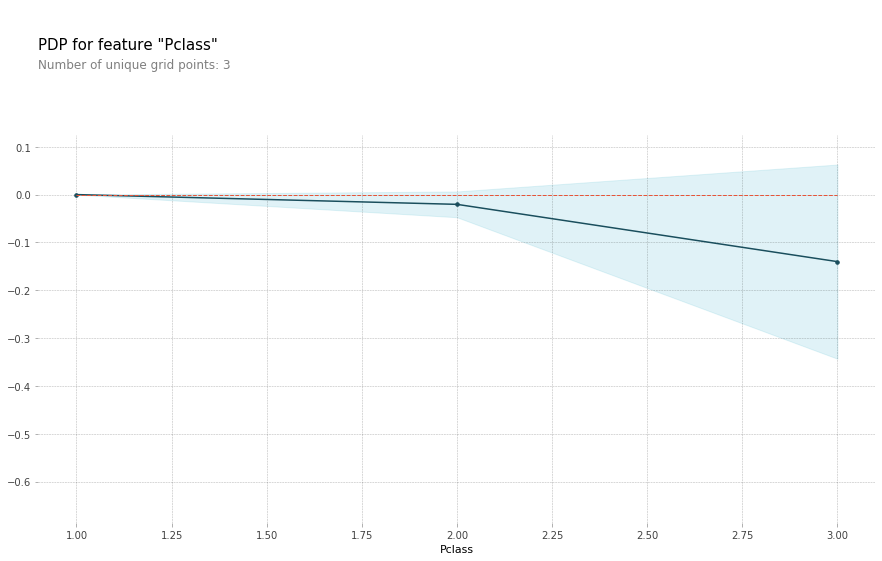

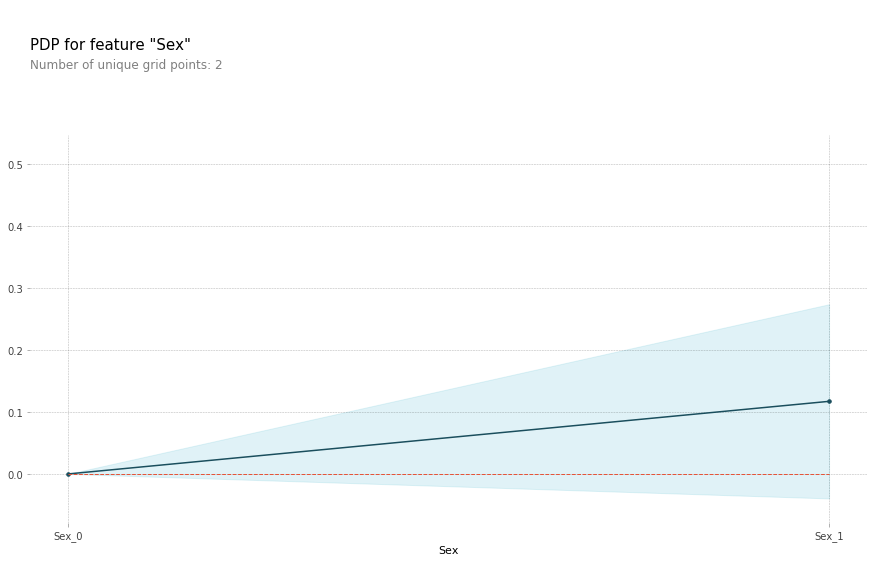

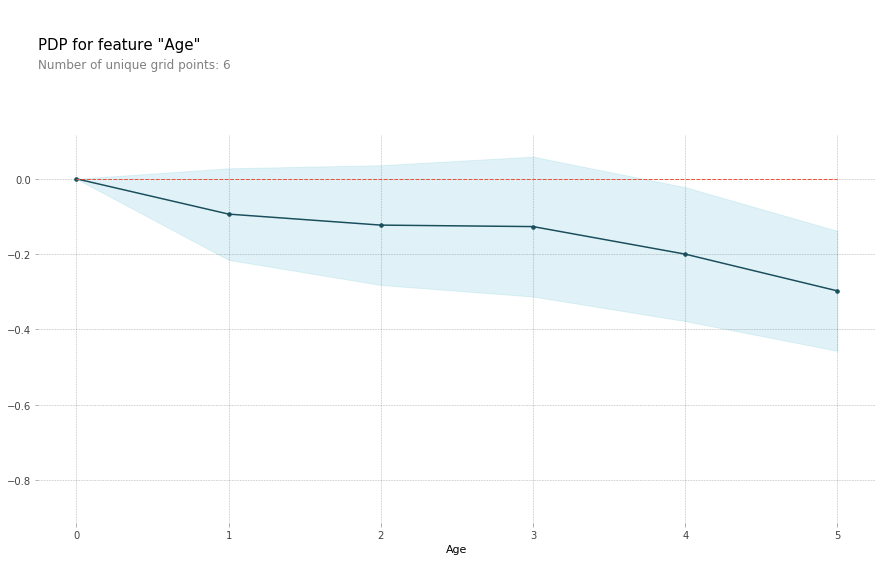

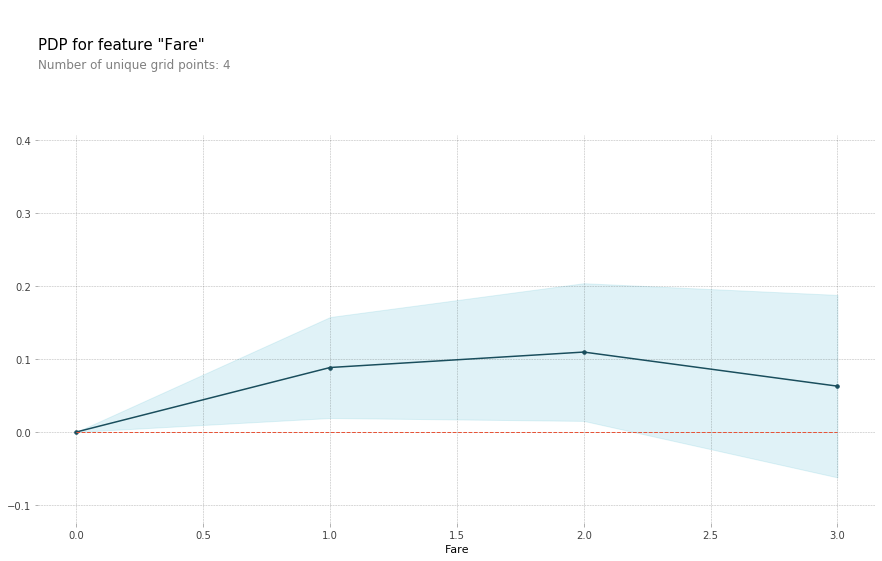

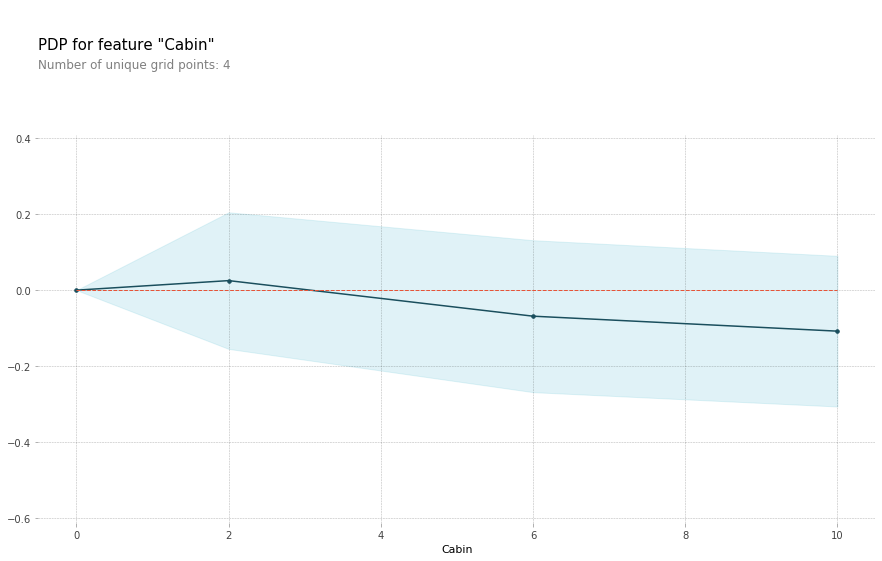

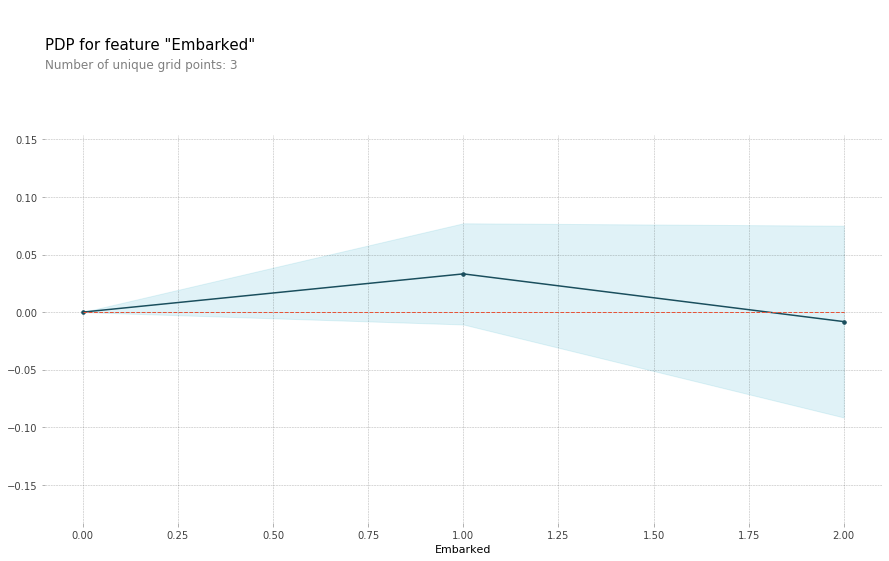

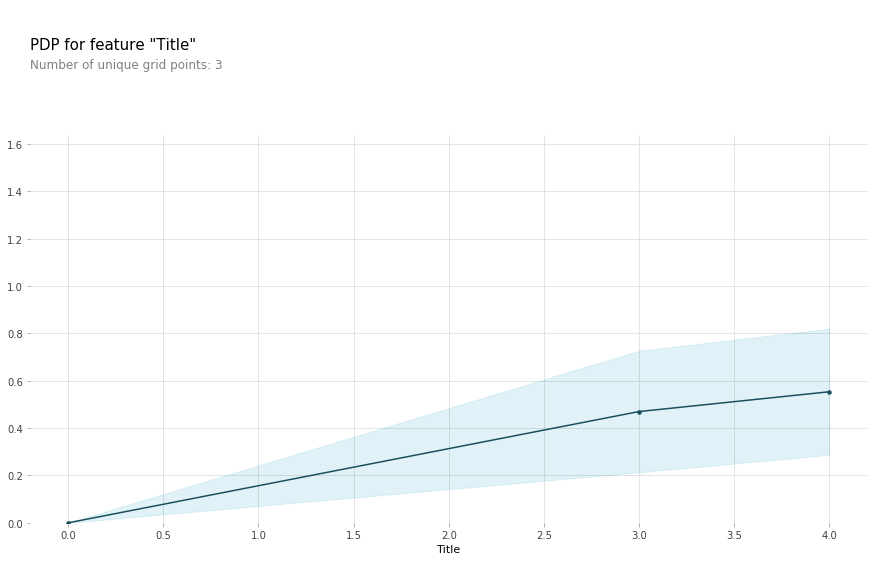

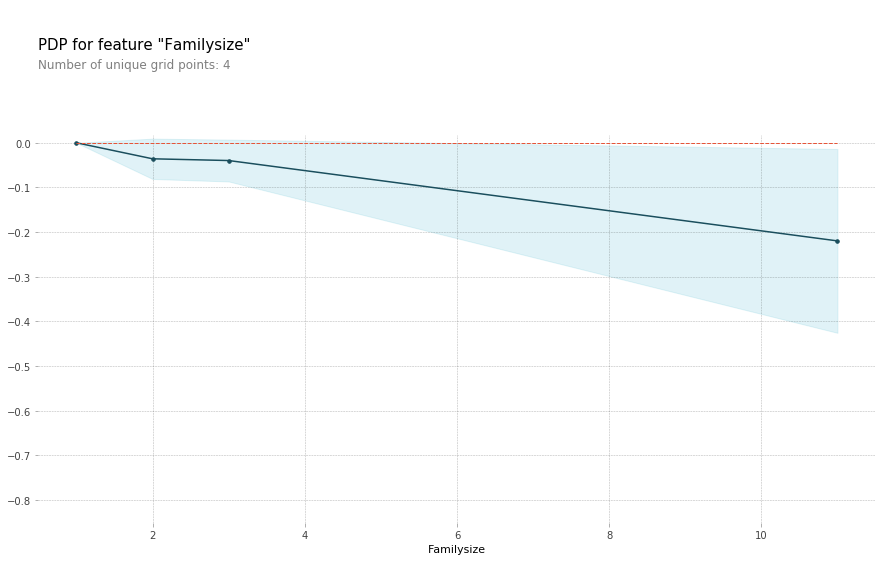

In [75]:
from pdpbox.pdp import pdp_isolate, pdp_plot
import matplotlib.pyplot as plt 

for i in feature_names:
    feature = i
    
    isolated = pdp_isolate(
      model=model, 
      dataset=X_train, 
      model_features=X_train.columns, 
      feature=feature
)
    pdp_plot(isolated, feature_name=feature);
    plt.show();

In [77]:
import shap

explainer = shap.TreeExplainer(model)
feature = X_val
shap_values = explainer.shap_values(feature)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=feature, 
)

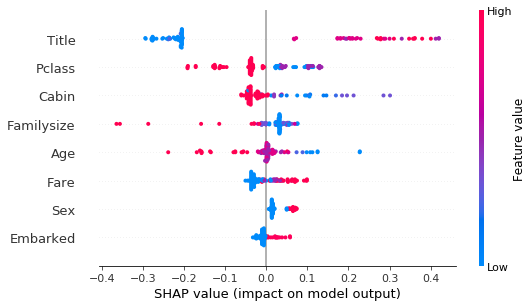

In [78]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_val.iloc[:100]) 
shap.summary_plot(shap_values, X_val[:100])

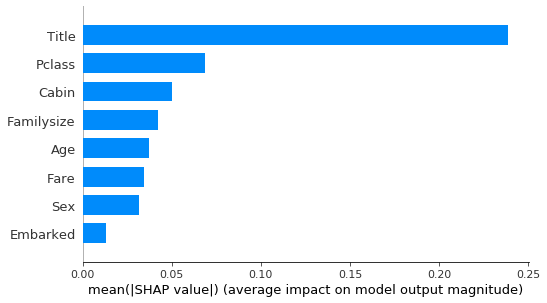

In [79]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

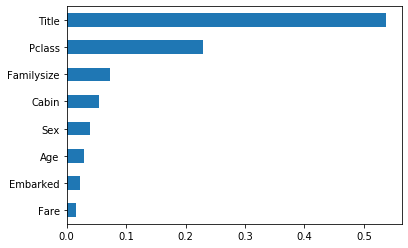

In [80]:
fi = pd.Series(model.feature_importances_, X_train.columns)
fi.sort_values(ascending = True).plot.barh();